Compares tracer values from different areas to determine if they are statistically different

In [30]:
from chem_ocean import ocean_data as oc_data
import chem_ocean.ocean_analysis as oc_an

from chem_ocean.ocean_plt_util import make_section, subplot_labels

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats

select station, longitude, latitude, depth, nitrate from woa13 where latitude> -40 AND latitude< -38 AND longitude>-30 and longitude<-28;
dict_keys(['station', 'longitude', 'latitude', 'depth', 'nitrate'])


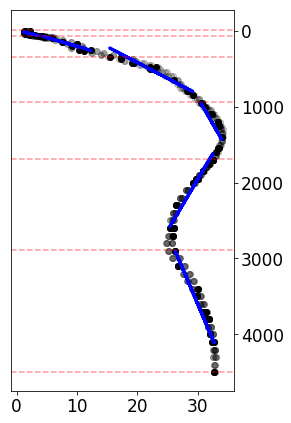

In [33]:
# Break water column into statistically different watermasses by regressing
# sections of the slope of at least 60 data points. as long as the r**2 is increasing, 
# expand the intervale by 5 meters. When the r**2 value begins to decline save the depth 
# and start a new section

minlat, minlon = -40, -30
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([minlat, minlat+2], [minlon, minlon+2], ['nitrate'])
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d)

select station, longitude, latitude, depth, nitrate from woa13 where latitude> -40 AND latitude< -35 AND longitude>-30 and longitude<-25;
dict_keys(['station', 'longitude', 'latitude', 'depth', 'nitrate'])


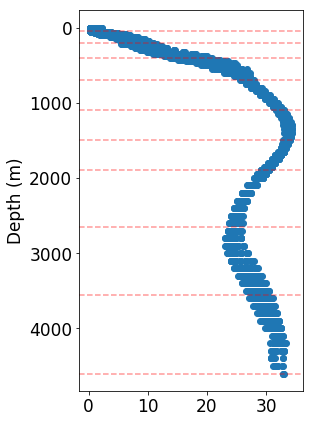

In [32]:
#Find depths of statistically different water masses by 1 tracer
# Assumes miniumum sample size of 200 of both samples
# starts from the bottom and if the samples between bottom bound and middle bound 
# are not statistically different from the sample between middle bound and upper bound,
# push the middle bound and upper bound up and try again
# once they are stastistically different drop the middle bound incrementally until reach the 
# depth where the p value is just less than .01
# then set bottom bound = middle bound and repeat

_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([-40, -35], [-30, -25], ['nitrate'])
intervals, fig, ax2 = oc_an.column_split_ptest(_feat_data, _d)

select station, longitude, latitude, depth, nitrate from woa13 where latitude> -60 AND latitude< -50 AND longitude>-40 and longitude<0 and depth=4000;
dict_keys(['station', 'longitude', 'latitude', 'depth', 'nitrate'])
select station, longitude, latitude, depth, nitrate from woa13 where latitude> 50 AND latitude< 60 AND longitude>-40 and longitude<0 and depth=4000;
dict_keys(['station', 'longitude', 'latitude', 'depth', 'nitrate'])
25.931961823
-58.575354582 5.86679997324e-135
p-value is so small that there is only a miniscule chance that these two samples could have been picked from the same population


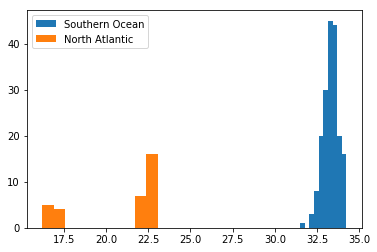

In [29]:
# Considering nitrate values from the North Atlantic and the South Atlantic

_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_plan([-60,-50], [-40,0], ['nitrate'], 4000)
data_s = _feat_data

_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_plan([50,60], [-40,0], ['nitrate'], 4000)
data_n = _feat_data

y_mean = np.mean(data_s) -np.mean(data_n)
std_error = (np.std(data_s)**2/(len(data_s)-1) + np.std(data_n)**2/(len(data_n)-1))**(.5)
t_score = y_mean/std_error
print(t_score) #why is this different from the scipy value?

#p-value after comparison with the t 
t2, p2 = stats.ttest_ind(data_n,data_s)

print(t2, p2)

plt.hist(data_s, label = 'Southern Ocean')
plt.hist(data_n, label = 'North Atlantic')

# oceans = ['Southern Ocean', 'North Atlantic']
# ax0.hist(x, n_bins, density=True, histtype='bar', label=oceans)
plt.legend(prop={'size': 10})


print('p-value is so small that there is only a miniscule chance that these two samples could have been picked from the same population')
